In [26]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pyflowbat as pfb

In [27]:
mpl.style.use(pfb.pyflowbat._std_vals.std_pfb_style)

In [28]:
pfb_data = pd.read_csv("example-output.csv")

In [29]:
flowjo_data = pd.read_csv("flowjo-analysis-formatted.csv")

cell line: 373
col: MEFLs
slope: 0.9675889033444526
adj r^2: 0.9999799901654011
col: MEPTRs
slope: 0.9900139217671229
adj r^2: 0.7393666415897667
cell line: 664
col: MEFLs
slope: 0.9778299548313497
adj r^2: 0.9998997615761952
col: MEPTRs
slope: 0.9777222234715153
adj r^2: 0.9999206006082898
cell line: 665
col: MEFLs
slope: 0.89756575350101
adj r^2: 0.945253724100881
col: MEPTRs
slope: 0.8515755771413152
adj r^2: 0.9193498886684246
cell line: 666
col: MEFLs
slope: 0.9289791426339982
adj r^2: 0.9667409561398994
col: MEPTRs
slope: 0.9314383080031114
adj r^2: 0.9668051732607006
cell line: 667
col: MEFLs
slope: 0.9346041065587108
adj r^2: 0.9711271081913131
col: MEPTRs
slope: 0.9357009062470008
adj r^2: 0.9701326898308315
cell line: 668
col: MEFLs
slope: 0.9114992557322958
adj r^2: 0.9687866175385477
col: MEPTRs
slope: 0.9095491842445046
adj r^2: 0.9685537366821083
cell line: 669
col: MEFLs
slope: 0.9272649390605459
adj r^2: 0.969668199272777
col: MEPTRs
slope: 0.9288686640205738
adj r^2: 0

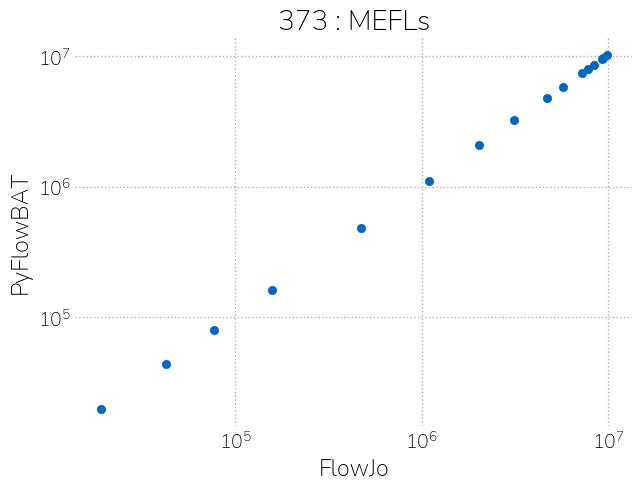

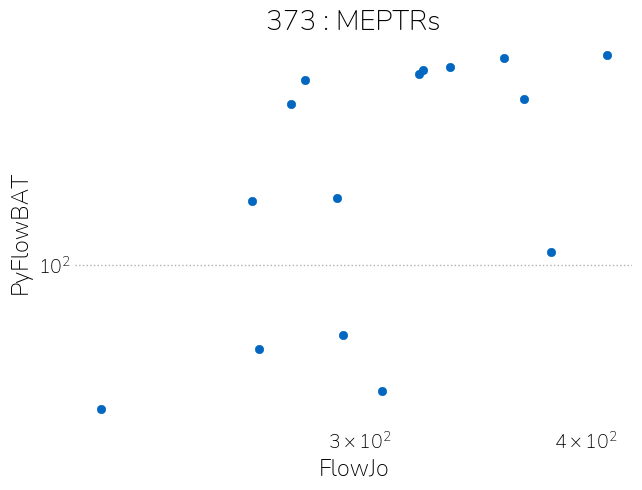

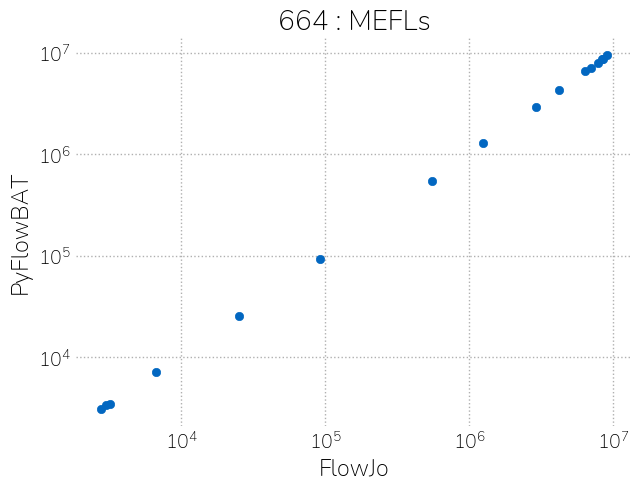

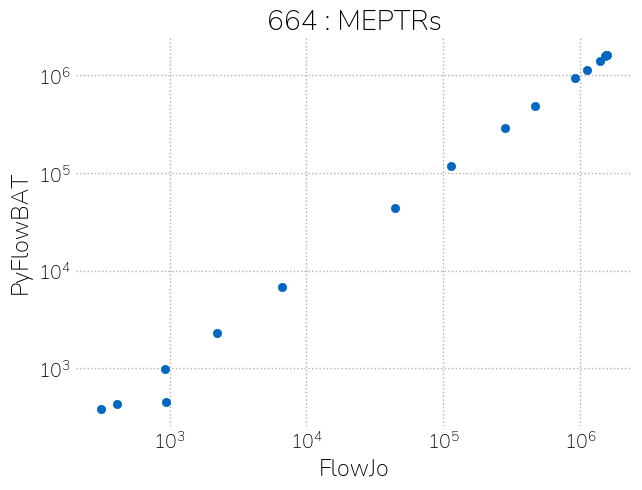

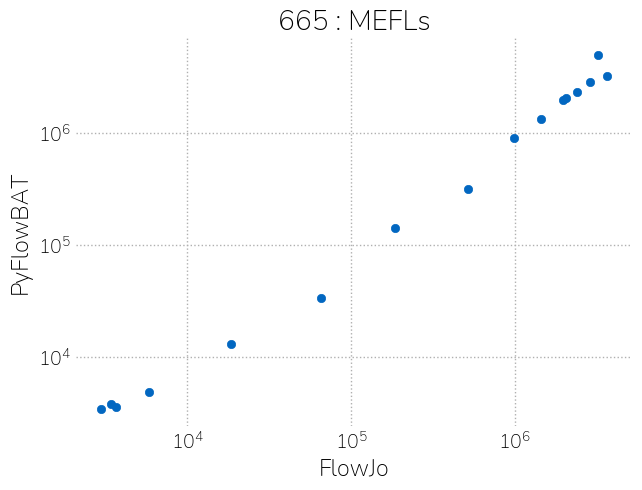

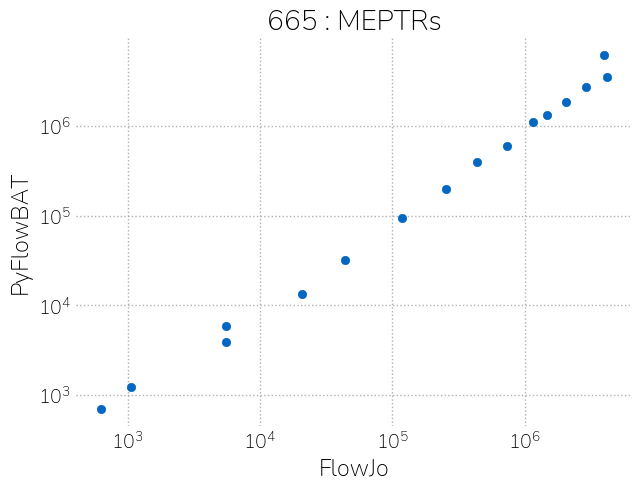

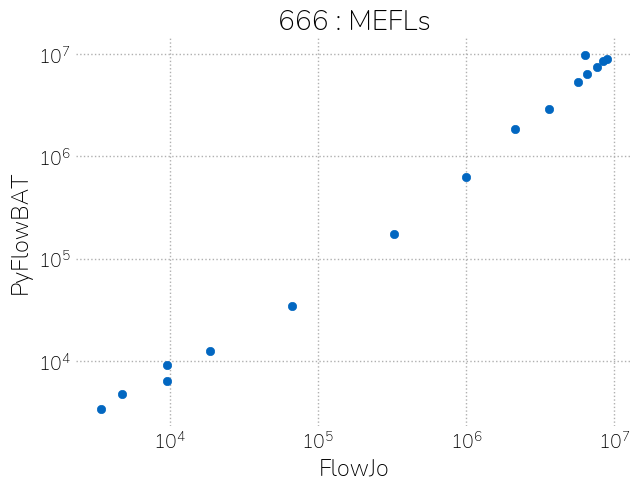

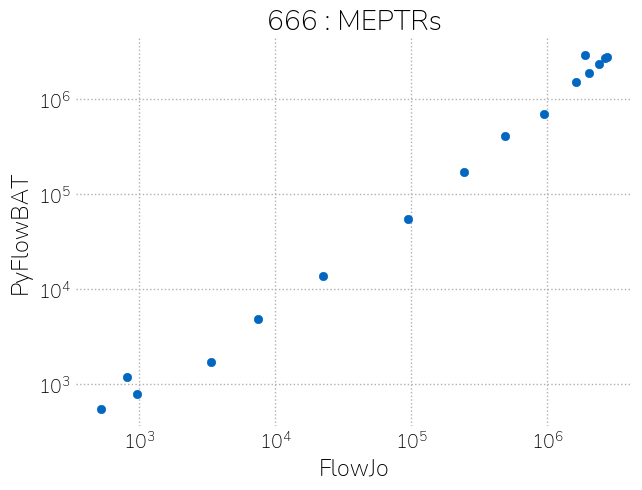

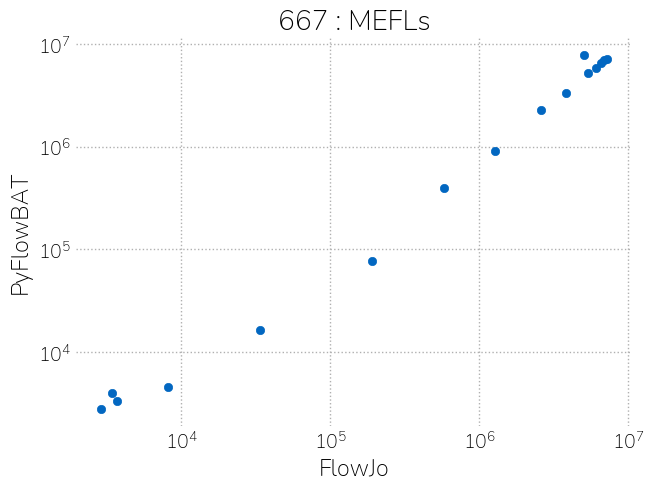

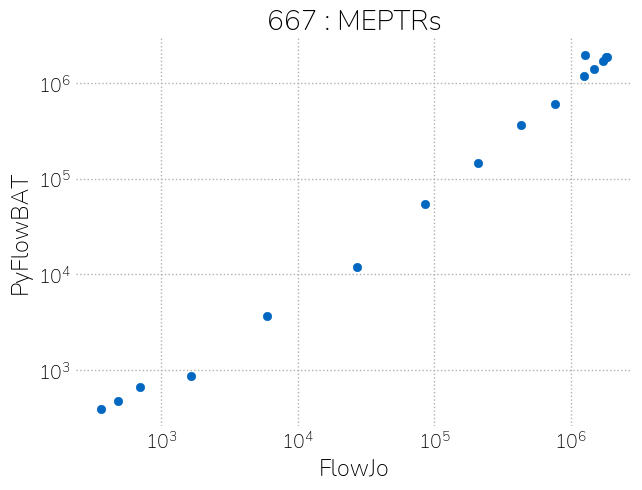

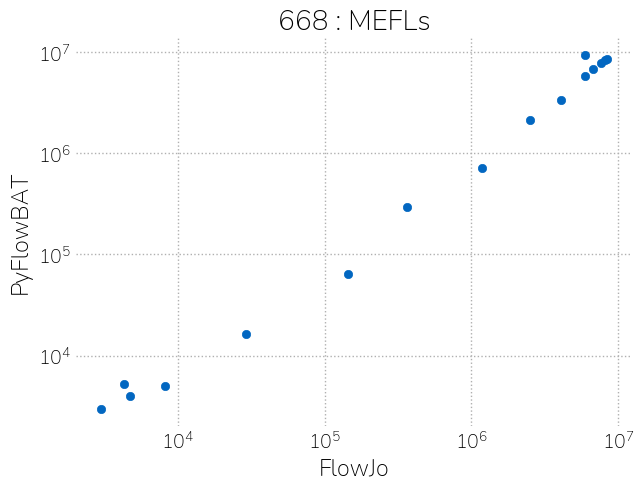

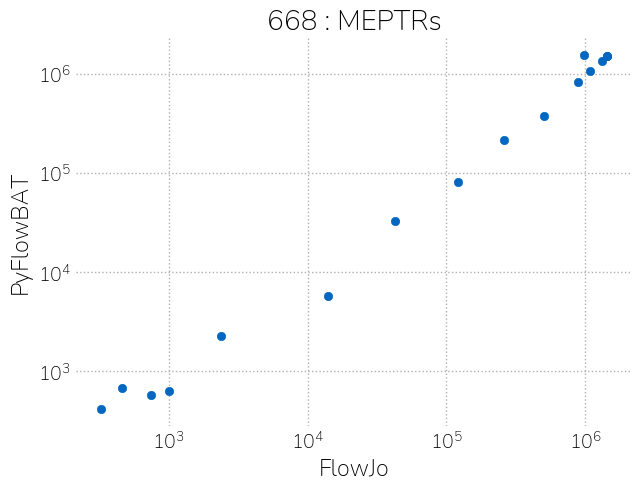

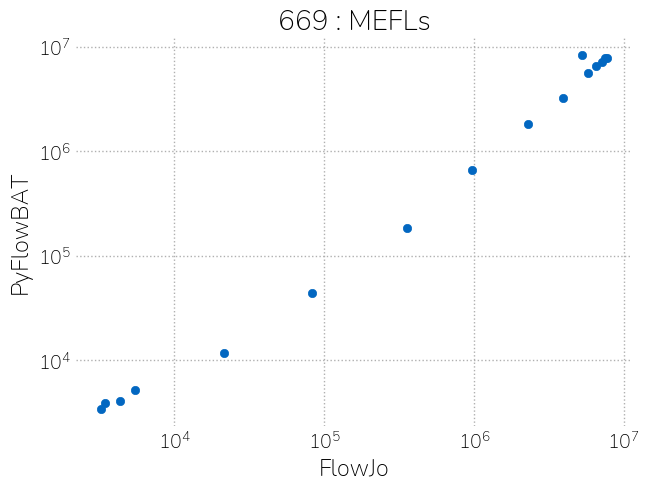

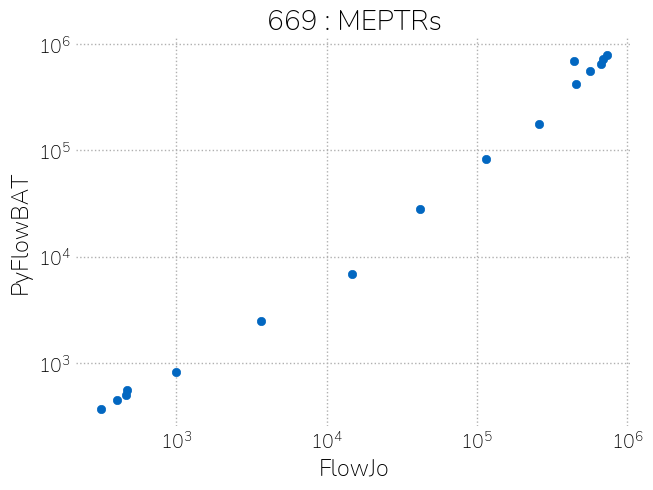

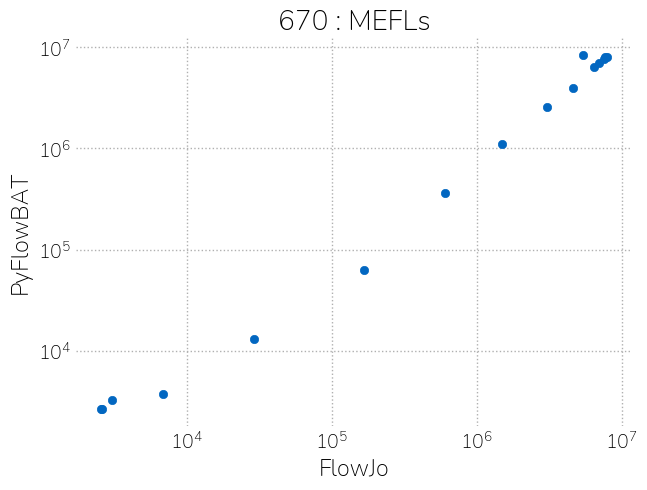

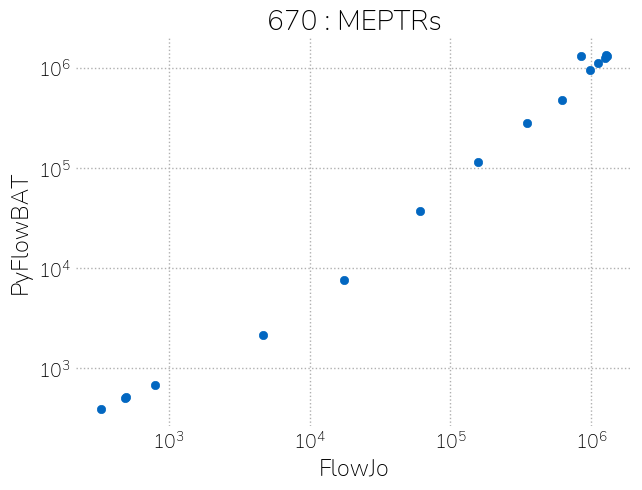

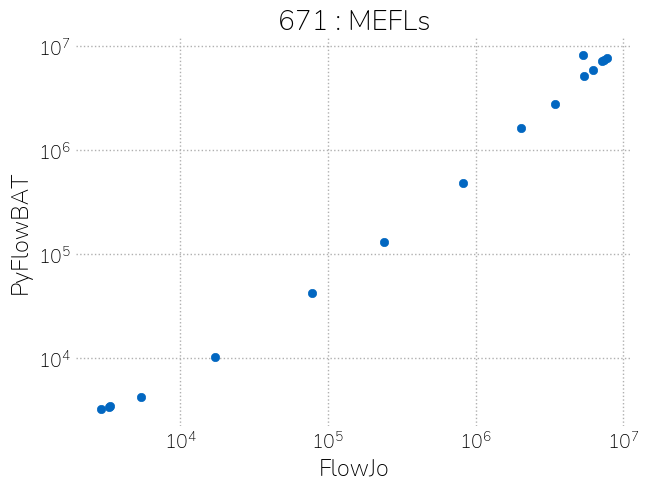

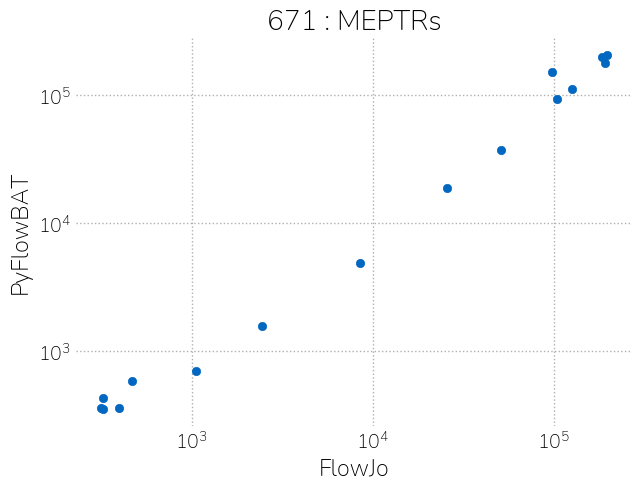

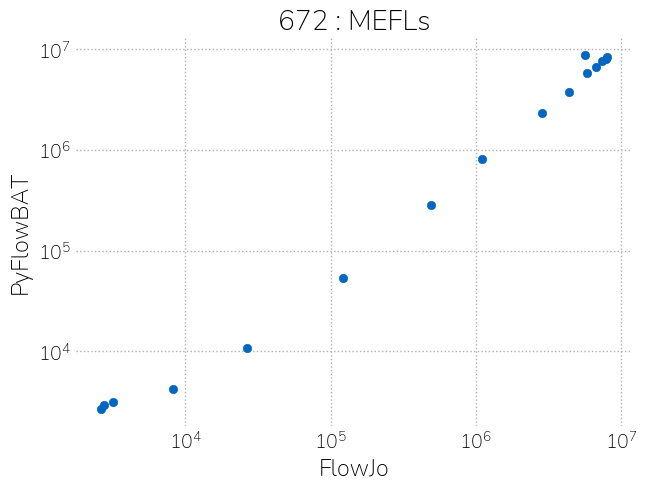

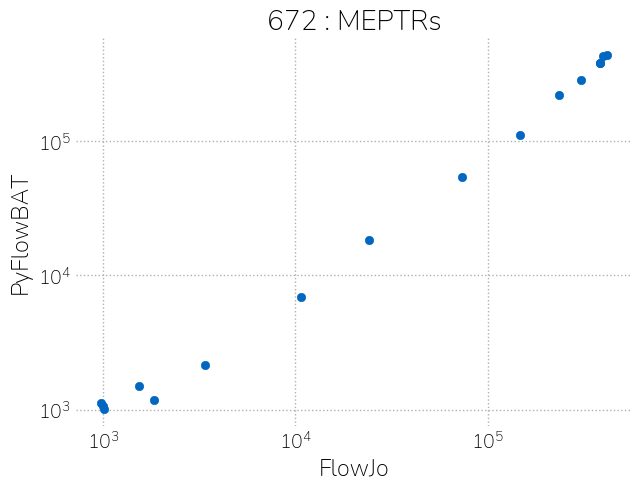

In [35]:
for cellline in [373, 664, 665, 666, 667, 668, 669, 670, 671, 672]:
    print(f"cell line: {cellline}")
    for col in ["MEFLs", "MEPTRs"]:
        print(f"col: {col}")
        model = sm.OLS(flowjo_data.loc[flowjo_data['CellLine'] == cellline][col], pfb_data.loc[pfb_data['CellLine'] == cellline][col])
        results = model.fit()
        slope = results.params[0]
        rsquared_adj = results.rsquared_adj
        print(f"slope: {slope}")
        print(f"adj r^2: {rsquared_adj}")
        fig = plt.figure()
        ax = plt.gca()
        ax.scatter(flowjo_data.loc[flowjo_data['CellLine'] == cellline][col], pfb_data.loc[pfb_data['CellLine'] == cellline][col])
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_title(f"{cellline} : {col}")
        ax.set_ylabel("PyFlowBAT")
        ax.set_xlabel("FlowJo")
    print()
        